In [1]:
import pickle, os
import numpy as np
import networkx as nx
import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [34]:
FILENAME = "large_pathways.txt"
with open(FILENAME, "r") as pathway_txt:
    lines = pathway_txt.readlines()

In [35]:
large_fpath = [line.rstrip() for line in lines]

KeyboardInterrupt: 

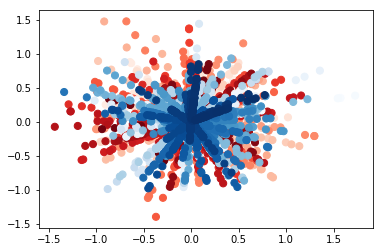

In [39]:
DIR_GLOB = "data/embedding/gae/*"
for fpath in large_fpath:
    list_files = glob.glob(DIR_GLOB + fpath)
    data_list = [np.load(file) for file in list_files]
    X_stack = np.vstack(data_list)
    X_stack_reduced = PCA(n_components=3).fit_transform(X_stack)
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    PATHWAY_SIZE = np.load(list_files[0]).shape[0]
    ax.scatter(X_stack_reduced[0:179*PATHWAY_SIZE, 0],
               X_stack_reduced[0:179*PATHWAY_SIZE, 1],
               cmap="Reds",
               c=np.arange(179*PATHWAY_SIZE),
               s=50)
    ax.scatter(X_stack_reduced[179*PATHWAY_SIZE:286*PATHWAY_SIZE, 0],
               X_stack_reduced[179*PATHWAY_SIZE:286*PATHWAY_SIZE, 1],
               cmap="Blues",
               c=np.arange(107*PATHWAY_SIZE),
               s=50)
    plt.savefig("dump/fig/{}.png".format(fpath[:-4]),
                dpi=150, bbox_inches='tight')
    plt.close()

'hsa00140'

In [5]:
X_stack_reduced = PCA(n_components=3).fit_transform(X_stack)

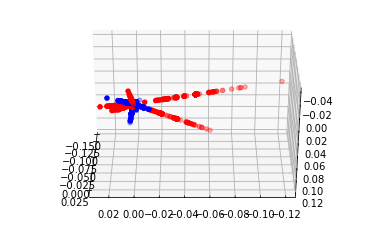

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax = Axes3D(fig, elev=-150, azim=180)
for i in range(len(data_list)):
    start_index = i * 15
    end_index = (i+1) * 15
    if i < 179 :
        ax.scatter(X_stack_reduced[start_index:end_index, 0],
                   X_stack_reduced[start_index:end_index, 1],
                   X_stack_reduced[start_index:end_index, 2],
                   c="r")
    else:
        ax.scatter(X_stack_reduced[start_index:end_index, 0],
                   X_stack_reduced[start_index:end_index, 1],
                   X_stack_reduced[start_index:end_index, 2],
                   c="b")

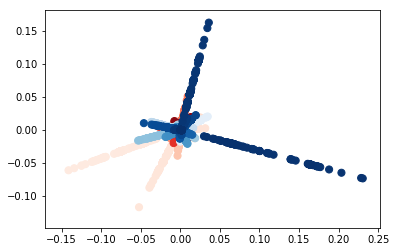

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
PATHWAY_SIZE=np.load(fpath_1[0]).shape[0]
ax.scatter(X_stack_reduced[0:179*PATHWAY_SIZE, 0],
           X_stack_reduced[0:179*PATHWAY_SIZE, 1],
           cmap="Reds",
           c=np.arange(179*PATHWAY_SIZE),
           s=50)
ax.scatter(X_stack_reduced[179*PATHWAY_SIZE:286*PATHWAY_SIZE, 0],
           X_stack_reduced[179*PATHWAY_SIZE:286*PATHWAY_SIZE, 1],
           cmap="Blues",
           c=np.arange(107*PATHWAY_SIZE),
           s=50)
plt.show()

In [9]:
X_stack_reduced.shape

(33462, 3)